In [1]:
import os
import glob
import cv2
import numpy as np
import cmath as cmt
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import matplotlib.animation as animation
from IPython.display import Video
from moviepy.editor import VideoFileClip



R = 0.5

delta_x = 0.1

def psi_gauss(x,R):
    return cmt.exp((-R*(x+20)*(x+20)) - x*complex(0,1)*5)/1.1195151349202477


## Lower-Upper limits to x

x1 = -40
x2 = abs(x1) + delta_x

x_values = np.arange(x1,x2,delta_x)
psi_x = []
for i in x_values:
    psi_x.append(psi_gauss(i,R))
    

#print(len(x))    
    
h_cut = 1
m = 1
delta_t = 0.1

c_0 = -2.5
#Pade's approximant
z1 = complex(-3,1.73025)
b = complex(0,h_cut*delta_t/(2*delta_x*delta_x))
row_l = []
column_l = []
data_l = []
c = [-2.722,1.5,-0.15,0.011]
a = []
for i in range(len(c)):
    a.append(c[i]*b/z1)

V = []   
#construct V (potential)
def V(x):
    if (x == 100 or x == len(x_values)-101):
        return 8000
    else :
        return 0
    

r = 2
for i in range(len(x_values)):
    for j in range(len(x_values)):
        if i == j:
            data_l.append(complex(1+a[0],delta_t*V(i)/z1))
            row_l.append(i)
            column_l.append(j)
        elif abs(i-j) <= r:
            data_l.append(a[abs(i-j)])
            row_l.append(i)
            column_l.append(j)
    



row = np.array(row_l)
column = np.array(column_l)
data = np.array(data_l)

#Define sparse matrix
sp_mat = csr_matrix((data, (row,column)), shape=(len(x_values),len(x_values))).toarray()



In [2]:
right_mat = np.dot(np.linalg.inv(sp_mat),sp_mat.conjugate())



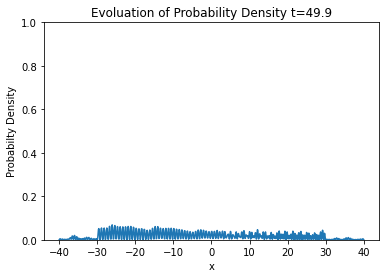

In [3]:
delta_L = int((x2-x1)/delta_x + 0.5)
psi_x_dummy = psi_x
for i in range(1,500):
    y = np.dot(right_mat,psi_x_dummy)
    plt.clf()
    psi_x_dummy = y
    Psi_arr = np.matrix(psi_x_dummy)
    Pd = np.multiply(Psi_arr,Psi_arr.conjugate())
    Pd[0,2]
    PD = []
    for j in range(delta_L):
        PD.append(Pd[0,j].real)
    
    abs_t = round(i*delta_t,2)
    plt.ylim(0,1)
    plt.xlabel('x')
    plt.ylabel('Probabilty Density')
    plt.title("Evoluation of Probability Density t="+str(abs_t))
    plt.plot(x_values,PD,label="t"+str(abs_t))
    plt.savefig("./"+str(i))
    

In [4]:
image_folder = '.'
video_name = 'evolution.avi'
os.chdir(".")
images = [int(img[:-4]) for img in os.listdir(image_folder) if img.endswith(".jpg") or img.endswith(".jpeg") or img.endswith("png")]
#print(images)
images.sort()
#print(images)
Images = [ str(i)+".png" for i in images]
#print(Images)
frame = cv2.imread(os.path.join(image_folder, Images[0]))
height, width, layers = frame.shape
video = cv2.VideoWriter(video_name, 0, 10, (width, height))
for image in Images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()


In [5]:
videoClip = VideoFileClip("./evolution.avi")
videoClip.write_gif("evolution.gif")

MoviePy - Building file evolution.gif with imageio.


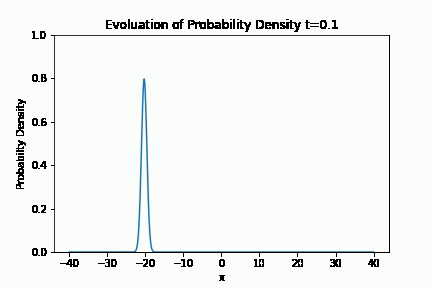

In [7]:
from IPython.display import Image
with open('./evolution.gif','rb') as f:
    display(Image(data=f.read(), format='png'))